In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import glob 
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df_bitcoin=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Bitcoin.csv") 
df_tether=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Tether.csv")


In [3]:
df_tether.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Tether,USDT,2015-02-26 23:59:59,1.212320,1.194710,1.210420,1.205740,5.955460,303364.1840
1,2,Tether,USDT,2015-03-02 23:59:59,0.607890,0.568314,0.571249,0.606502,3.032500,152595.9032
2,3,Tether,USDT,2015-03-03 23:59:59,0.606229,0.604416,0.605129,0.606229,3.031130,152527.2164
3,4,Tether,USDT,2015-03-06 23:59:59,1.000000,1.000000,1.000000,1.000000,92.647202,251600.0000
4,5,Tether,USDT,2015-03-07 23:59:59,1.000000,1.000000,1.000000,1.000000,58196.800781,251600.0000


In [5]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_tether['Date'] = pd.to_datetime(df_tether['Date'])

df_merged = pd.merge(df_bitcoin, df_tether, on='Date', suffixes=('_btc', '_USDT'))
btc_precio = df_merged['High_btc']
USDT_precio = df_merged['High_USDT']

corr, _ = pearsonr(btc_precio, USDT_precio)
print(f"Coeficiente  entre BTC y USDT: {corr}")

Coeficiente  entre BTC y USDT: 0.010205007112624662


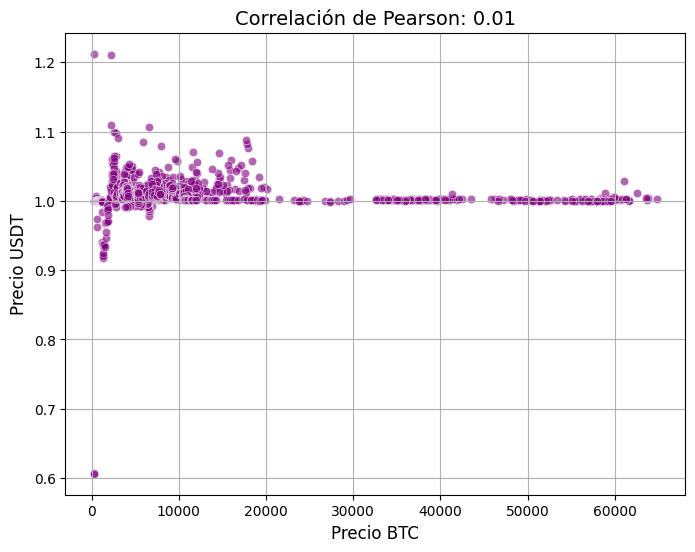

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=btc_precio, y=USDT_precio, color='purple', alpha=0.6)
plt.title(f'Correlación de Pearson: {corr:.2f}', fontsize=14)
plt.xlabel('Precio BTC', fontsize=12)
plt.ylabel('Precio USDT', fontsize=12)
plt.grid(True)
plt.show()

In [8]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_tether['Date'] = pd.to_datetime(df_tether['Date'])

start_date = '2015-02-26 23:59:59'
df_btc_filtered = df_bitcoin[df_bitcoin['Date'] >= start_date]
df_USDT_filtered = df_tether[df_tether['Date'] >= start_date]

df_merged = pd.merge(df_bitcoin, df_tether, on='Date', suffixes=('_btc', '_USDT'))
df_merged['btc_change'] = df_merged['Close_btc'].diff()
df_merged['USDT_change'] = df_merged['Close_USDT'].diff()

btc_up_dates = df_merged[df_merged['btc_change'] > 0]['Date']
USDT_up_dates = df_merged[df_merged['USDT_change'] > 0]['Date']

time_diffs = []
for btc_date in btc_up_dates:
    nearest_USDT_date = USDT_up_dates.iloc[(USDT_up_dates - btc_date).abs().argmin()]
    time_diff = abs((nearest_USDT_date - btc_date).days)
    time_diffs.append({'BTC Date': btc_date, 'USDT Date': nearest_USDT_date, 'Tiempo de diferencia (dias)': time_diff})

time_diffs_df = pd.DataFrame(time_diffs)
print(time_diffs_df)

                BTC Date           USDT Date  Tiempo de diferencia (dias)
0    2015-03-02 23:59:59 2015-03-06 23:59:59                            4
1    2015-03-03 23:59:59 2015-03-06 23:59:59                            3
2    2015-03-07 23:59:59 2015-03-06 23:59:59                            1
3    2015-03-09 23:59:59 2015-03-06 23:59:59                            3
4    2015-03-10 23:59:59 2015-03-06 23:59:59                            4
...                  ...                 ...                          ...
1267 2021-06-29 23:59:59 2021-06-29 23:59:59                            0
1268 2021-07-02 23:59:59 2021-07-01 23:59:59                            1
1269 2021-07-03 23:59:59 2021-07-01 23:59:59                            2
1270 2021-07-04 23:59:59 2021-07-05 23:59:59                            1
1271 2021-07-06 23:59:59 2021-07-05 23:59:59                            1

[1272 rows x 3 columns]
